In [1]:
#Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [2]:
dataset= pd.read_csv("AAPL.csv")

In [3]:
dataset.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
2766,2019-09-27,55.134998,55.240002,54.320000,54.705002,53.902031,101408000
2767,2019-09-30,55.224998,56.145000,55.197498,55.992500,55.170628,103909600


In [4]:
dataset['Mean'] = (dataset['Low'] + dataset['High'])/2
dataset.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Mean
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.351165,1296484000,3.924107
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.074152,1609364400,3.728393


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2768 non-null   object 
 1   Open       2768 non-null   float64
 2   High       2768 non-null   float64
 3   Low        2768 non-null   float64
 4   Close      2768 non-null   float64
 5   Adj Close  2768 non-null   float64
 6   Volume     2768 non-null   int64  
 7   Mean       2768 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 173.1+ KB


In [6]:
dataset.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Mean
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.351165,1296484000,3.924107
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.074152,1609364400,3.728393


In [7]:
# preparing the dataset by shoifting open , close, Low, High  by 1
steps=-1
dataset_for_prediction= dataset.copy()
dataset_for_prediction['Actual']=dataset_for_prediction['Mean'].shift(steps)
dataset_for_prediction.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Mean,Actual
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.351165,1296484000,3.924107,3.728393
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.074152,1609364400,3.728393,3.591964
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.981099,2294398400,3.591964,3.327143


In [8]:
dataset_for_prediction=dataset_for_prediction.dropna()

In [9]:
dataset_for_prediction.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Mean,Actual
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.351165,1296484000,3.924107,3.728393
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.074152,1609364400,3.728393,3.591964
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.981099,2294398400,3.591964,3.327143


In [10]:
dataset_for_prediction[2629:2640]

,Date,Open,High,Low,Close,Adj Close,Volume,Mean,Actual
2629,2019-03-14,45.974998,46.025002,45.639999,45.932499,44.914021,94318000,45.832501,46.383751
2630,2019-03-15,46.212502,46.832500,45.935001,46.529999,45.498264,156171600,46.383751,46.772499
2631,2019-03-18,46.450001,47.097500,46.447498,47.005001,45.962746,104879200,46.772499,46.863750
2632,2019-03-19,47.087502,47.247501,46.480000,46.632500,45.598503,126585600,46.863750,46.777500
2633,2019-03-20,46.557499,47.372501,46.182499,47.040001,45.996967,124140800,46.777500,48.267499
2634,2019-03-21,47.505001,49.082500,47.452499,48.772499,47.691051,204136800,48.267499,48.558751
2635,2019-03-22,48.834999,49.422501,47.695000,47.762501,46.703445,169630800,48.558751,47.322501
2636,2019-03-25,47.877499,47.994999,46.650002,47.185001,46.138744,175381200,47.322501,47.182501
2637,2019-03-26,47.915001,48.220001,46.145000,46.697498,45.662060,199202000,47.182501,47.038750
2638,2019-03-27,47.187500,47.439999,46.637501,47.117500,46.072750,119393600,47.038750,47.136250


In [11]:
#dataset_for_prediction['Date']=dataset_for_prediction['Date'].asfreq(BDay())

In [12]:
#dataset_for_prediction.to_csv('Check data.csv')

In [11]:
from pandas.tseries.offsets import BDay
dataset_for_prediction['Date'] =pd.to_datetime(dataset_for_prediction['Date'])
dataset_for_prediction.index= dataset_for_prediction['Date']
#dataset_test.index.freq='B'


In [12]:
dataset_for_prediction.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Mean,Actual
Date,,,,,,,,,
2008-10-01,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.351165,1296484000,3.924107,3.728393
2008-10-02,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.074152,1609364400,3.728393,3.591964


In [13]:
dataset_for_prediction.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2767 entries, 2008-10-01 to 2019-09-27
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2767 non-null   datetime64[ns]
 1   Open       2767 non-null   float64       
 2   High       2767 non-null   float64       
 3   Low        2767 non-null   float64       
 4   Close      2767 non-null   float64       
 5   Adj Close  2767 non-null   float64       
 6   Volume     2767 non-null   int64         
 7   Mean       2767 non-null   float64       
 8   Actual     2767 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 216.2 KB


Text(0.5, 1.0, ' Apple Stock Value')

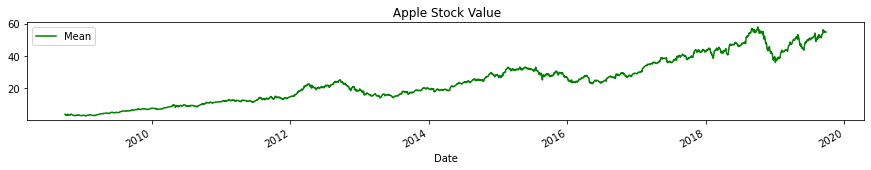

In [14]:

dataset_for_prediction['Mean'].plot(color='green', figsize=(15,2))
plt.legend([  'Mean'])
plt.title(" Apple Stock Value")

Text(0.5, 1.0, ' Apple  Stock Volume')

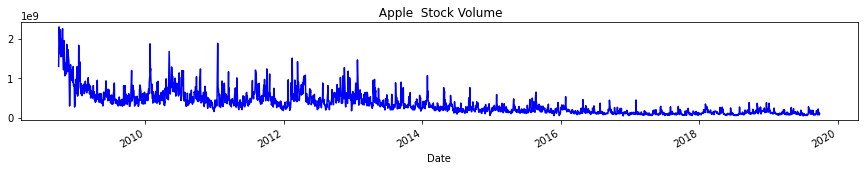

In [15]:
dataset_for_prediction['Volume'].plot(color='blue', figsize=(15,2))
plt.title(" Apple  Stock Volume")

In [16]:
# normalizing input features
from sklearn.preprocessing import MinMaxScaler
sc_in = MinMaxScaler(feature_range=(0, 1))
scaled_input = sc_in.fit_transform(dataset_for_prediction[['Low', 'High','Open', 'Close', 'Volume', 'Adj Close', 'Mean']])
scaled_input =pd.DataFrame(scaled_input)
X= scaled_input

In [100]:
dataset_for_prediction[['Actual']]

,Actual
Date,
2008-10-01,3.728393
2008-10-02,3.591964
2008-10-03,3.327143
2008-10-06,3.400893
2008-10-07,3.250179
...,...
2019-09-23,54.960001
2019-09-24,54.830000
2019-09-25,54.971250


In [17]:
sc_out = MinMaxScaler(feature_range=(0, 1))
scaler_output = sc_out.fit_transform(dataset_for_prediction[['Actual']])
scaler_output =pd.DataFrame(scaler_output)
y=scaler_output

In [19]:
X= scaled_input


In [20]:
X.rename(columns={0:'Low', 1:'High', 2:'Open', 3:'Close', 4:'Volume', 5:'Adj Close', 6:'Mean'}, inplace=True)
X= pd.DataFrame(X)
X.index=dataset_for_prediction.index
X.tail(2)

,Low,High,Open,Close,Volume,Adj Close,Mean
Date,,,,,,,
2019-09-26,0.94991,0.943496,0.950875,0.944862,0.013289,0.960536,0.946681
2019-09-27,0.94282,0.943587,0.953335,0.940018,0.024883,0.955645,0.943206


In [21]:
y.rename(columns={0:'Stock Price next day'}, inplace= True)
y.index=dataset_for_prediction.index
y.head(2)

,Stock Price next day
Date,
2008-10-01,0.015763
2008-10-02,0.013284


<ipython-input-22-ce31ecc0973f>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seas_d=sm.tsa.seasonal_decompose(X['Mean'],model='add',freq=365);


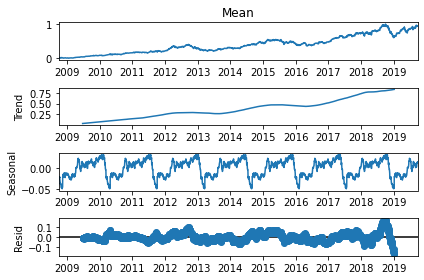

In [22]:
import statsmodels.api as sm
seas_d=sm.tsa.seasonal_decompose(X['Mean'],model='add',freq=365);
fig=seas_d.plot()
fig.set_figheight(4)
plt.show()

In [23]:
train_size=int(len(dataset) *0.80)
test_size = int(len(dataset)) - train_size
print(test_size)

554


In [24]:
train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()

In [25]:
test_X.columns

Index(['Low', 'High', 'Open', 'Close', 'Volume', 'Adj Close', 'Mean'], dtype='object')

In [26]:
y_test=y['Stock Price next day'][:train_size].dropna()

In [28]:
type(y_test)

pandas.core.series.Series

In [31]:
y_test

Date
2008-10-01    0.015763
2008-10-02    0.013284
2008-10-03    0.008474
2008-10-06    0.009813
2008-10-07    0.007075
                ...   
2017-07-12    0.615500
2017-07-13    0.621700
2017-07-14    0.628081
2017-07-17    0.626559
2017-07-18    0.632395
Name: Stock Price next day, Length: 2214, dtype: float64

In [32]:

from statsmodels.tsa.stattools import adfuller
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Strong evidence against Null Hypothesis")
        print("Reject Null Hypothesis - Data is  Stationary")
        print("Data is Stationary", title)
    else:
        print("Strong evidence for  Null Hypothesis")
        print("Accept Null Hypothesis - Data is not Stationary")
        print("Data is NOT Stationary for", title)

In [33]:
test_adf(y_test, " Stock Price")

Strong evidence for  Null Hypothesis
Accept Null Hypothesis - Data is not Stationary
Data is NOT Stationary for  Stock Price


In [34]:
test_adf(y_test.diff(), " Stock Price")

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is  Stationary
Data is Stationary  Stock Price


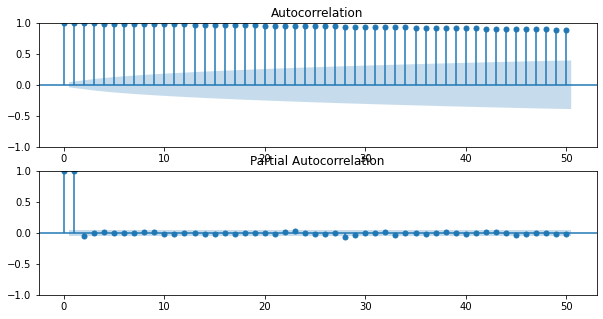

In [35]:
#Correlograms
fig,ax= plt.subplots(2,1, figsize=(10,5))
fig=sm.tsa.graphics.plot_acf(y_test, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(y_test, lags=50, ax=ax[1])
plt.show()


In [39]:
#pip install pmdarima

In [38]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_y, 
                     exogenous= train_X,
                     start_p=1,  start_q=1, 
                     max_p=7,  max_q=7, 
                     d=1, max_d=7,
                     trace=True, 
                     error_action='ignore', 
                     suppress_warnings=True, 
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17654.319, Time=3.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17648.029, Time=2.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17695.931, Time=8.44 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17733.933, Time=8.75 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17644.957, Time=3.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-17753.773, Time=8.47 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-17658.862, Time=13.20 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-17783.416, Time=11.89 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-17730.451, Time=13.45 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-17718.342, Time=15.26 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=13.56 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-17648.693, Time=2.41 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0] intercept
Total fit time: 104.601 seconds


In [40]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2214
Model:               SARIMAX(0, 1, 3)   Log Likelihood                8903.708
Date:                Mon, 07 Jun 2021   AIC                         -17783.416
Time:                        22:56:45   BIC                         -17714.991
Sample:                             0   HQIC                        -17758.420
                               - 2214                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    4.56e-05   2.94e-05      1.553      0.120   -1.19e-05       0.000
Low            0.0815      0.024      3.386      0.001       0.034       0.129
High          -0.0220      0.027     -0.809      0.418      -0.075       0.031
Open          -0.1196      0.027     -4.425      0.000      -0.173      -0.067
Close          0.7116      0.203      3.504      0.000       0.314       1.110
Volume         0.0022      0.001      1.558      0.119      -0.001       0.005
Adj Close      0.1337      0.211      0.633      0.527      -0.280       0.548
Mean           0.0294      0.021      1.432      0.152      -0.011       0.070
ma.L1         -0.7288      0.043    -17.007      0.000      -0.813      -0.645
ma.L2         -0.0157      0.022     -0.719      0.472      -0.059       0.027
ma.L3          0.0240      0.019      1.269      0.204      -0.013       0.061
sigma2      1.832e-05   1.96e-07     93.328      0.000    1.79e-05    1.87e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             19606.91
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               7.23   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.3e+17. Standard errors may be unstable.
"""

In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_y, 
           exog=train_X,
              order=(0,1,1),
              enforce_invertibility=False, enforce_stationarity=False)

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [42]:
results= model.fit()

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [43]:
test_X

,Low,High,Open,Close,Volume,Adj Close,Mean
Date,,,,,,,
2017-07-19,0.634827,0.629998,0.634066,0.633090,0.017005,0.622444,0.632395
2017-07-20,0.635925,0.631441,0.638714,0.630011,0.010461,0.619441,0.633667
2017-07-21,0.629932,0.625579,0.631833,0.629694,0.026485,0.619131,0.627740
2017-07-24,0.634598,0.634598,0.634522,0.637933,0.018019,0.627170,0.634598
2017-07-25,0.643289,0.640911,0.640082,0.640876,0.013325,0.630041,0.642092
...,...,...,...,...,...,...,...
2019-09-23,0.944513,0.938536,0.946090,0.939565,0.013879,0.955187,0.941503
2019-09-24,0.942408,0.950486,0.955568,0.934857,0.035268,0.950434,0.946476
2019-09-25,0.942180,0.946022,0.944267,0.950022,0.018749,0.965746,0.944114


In [44]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 553 entries, 2017-07-19 to 2019-09-27
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Low        553 non-null    float64
 1   High       553 non-null    float64
 2   Open       553 non-null    float64
 3   Close      553 non-null    float64
 4   Volume     553 non-null    float64
 5   Adj Close  553 non-null    float64
 6   Mean       553 non-null    float64
dtypes: float64(7)
memory usage: 34.6 KB


In [45]:
test_X[['Low', 'High', 'Open', 'Close', 'Volume', 'Adj Close', 'Mean']]

,Low,High,Open,Close,Volume,Adj Close,Mean
Date,,,,,,,
2017-07-19,0.634827,0.629998,0.634066,0.633090,0.017005,0.622444,0.632395
2017-07-20,0.635925,0.631441,0.638714,0.630011,0.010461,0.619441,0.633667
2017-07-21,0.629932,0.625579,0.631833,0.629694,0.026485,0.619131,0.627740
2017-07-24,0.634598,0.634598,0.634522,0.637933,0.018019,0.627170,0.634598
2017-07-25,0.643289,0.640911,0.640082,0.640876,0.013325,0.630041,0.642092
...,...,...,...,...,...,...,...
2019-09-23,0.944513,0.938536,0.946090,0.939565,0.013879,0.955187,0.941503
2019-09-24,0.942408,0.950486,0.955568,0.934857,0.035268,0.950434,0.946476
2019-09-25,0.942180,0.946022,0.944267,0.950022,0.018749,0.965746,0.944114


In [46]:
train_X

,Low,High,Open,Close,Volume,Adj Close,Mean
Date,,,,,,,
2008-10-01,0.019075,0.019558,0.021177,0.019996,0.556275,0.017620,0.019318
2008-10-02,0.014246,0.017258,0.018632,0.014163,0.695398,0.012480,0.015763
2008-10-03,0.010750,0.015783,0.016021,0.012203,1.000000,0.010753,0.013284
2008-10-06,0.006104,0.010810,0.008183,0.012895,0.916858,0.011363,0.008474
2008-10-07,0.007025,0.012562,0.013730,0.007088,0.815191,0.006246,0.009813
...,...,...,...,...,...,...,...
2017-07-12,0.611360,0.606369,0.613058,0.609187,0.024051,0.599124,0.608847
2017-07-13,0.614196,0.616786,0.611372,0.618377,0.024611,0.608090,0.615500
2017-07-14,0.622842,0.620573,0.622628,0.624126,0.015599,0.613699,0.621700


In [47]:
step_wise=auto_arima(train_y, 
                     start_p=1,  start_q=1, 
                     max_p=7,  max_q=7, 
                     d=1, max_d=7,
                     trace=True, 
                     error_action='ignore', 
                     suppress_warnings=True, 
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17218.100, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17153.382, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17213.276, Time=0.44 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17219.295, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17148.559, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-17218.621, Time=0.98 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-17217.589, Time=1.71 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-17216.259, Time=0.25 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 5.132 seconds


In [48]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2214
Model:               SARIMAX(0, 1, 1)   Log Likelihood                8612.647
Date:                Mon, 07 Jun 2021   AIC                         -17219.295
Time:                        23:40:17   BIC                         -17202.188
Sample:                             0   HQIC                        -17213.046
                               - 2214                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.000      2.142      0.032    2.33e-05       0.001
ma.L1          0.1761      0.012     14.218      0.000       0.152       0.200
sigma2      2.433e-05   2.94e-07     82.707      0.000    2.38e-05    2.49e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10306.93
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               7.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
model= SARIMAX(train_y,            
              order=(2,1,0),
              enforce_invertibility=False, enforce_stationarity=False)
results = model.fit()
forecast = results.forecast(steps=2)

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [50]:
 a=train_size+test_size-(steps)-train_size
steps

-1

In [51]:
model= SARIMAX(train_y, 
               exog=train_X,            
              order=(0,1,1),
              enforce_invertibility=False, enforce_stationarity=False)
results = model.fit()
predictions= results.predict(start =train_size, end=train_size+test_size+(steps)-1,exog=test_X)
print(len(predictions))

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


553


/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [52]:
forecast_1= results.forecast(steps=test_size-1, exog=test_X)

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [56]:
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])


In [57]:
forecast_apple= pd.DataFrame(forecast_1)
forecast_apple.reset_index(drop=True, inplace=True)
forecast_apple.index=test_X.index
forecast_apple['Actual'] =scaler_output.iloc[train_size:, 0]
forecast_apple.rename(columns={0:'Forecast'}, inplace=True)

In [59]:
forecast_apple

,predicted_mean,Actual
Date,,
2017-07-19,0.633777,0.633667
2017-07-20,0.629705,0.627740
2017-07-21,0.630301,0.634598
2017-07-24,0.638705,0.642092
2017-07-25,0.641390,0.645157
...,...,...
2019-09-23,0.926814,0.946476
2019-09-24,0.919760,0.944114
2019-09-25,0.937955,0.946681


<AxesSubplot:xlabel='Date'>

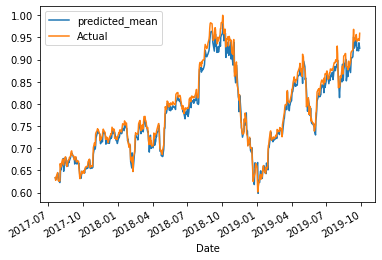

In [60]:
forecast_apple['predicted_mean'].plot(legend=True)
forecast_apple['Actual'].plot(legend=True)

In [61]:
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X.index
predictions['Actual'] = act['Stock Price next day']
predictions.rename(columns={0:'Pred'}, inplace=True)



In [63]:
predictions

,predicted_mean,Actual
Date,,
2017-07-19,0.633777,0.633667
2017-07-20,0.629705,0.627740
2017-07-21,0.630301,0.634598
2017-07-24,0.638705,0.642092
2017-07-25,0.641390,0.645157
...,...,...
2019-09-23,0.926814,0.946476
2019-09-24,0.919760,0.944114
2019-09-25,0.937955,0.946681


<AxesSubplot:xlabel='Date'>

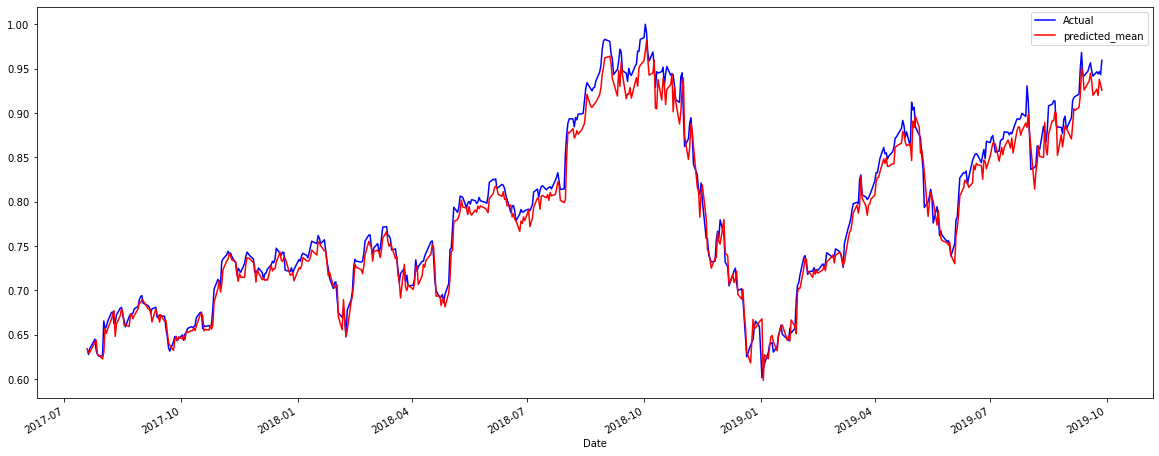

In [64]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
predictions['predicted_mean'].plot(legend=True, color='red', figsize=(20,8))



In [65]:
from statsmodels.tools.eval_measures import rmse
error=rmse(predictions['predicted_mean'], predictions['Actual'])
error

0.014691332468744546

## Inverse Scalar

In [66]:
X.head(2)


,Low,High,Open,Close,Volume,Adj Close,Mean
Date,,,,,,,
2008-10-01,0.019075,0.019558,0.021177,0.019996,0.556275,0.01762,0.019318
2008-10-02,0.014246,0.017258,0.018632,0.014163,0.695398,0.01248,0.015763


In [68]:
# invert predictions, scale values back to real index/price range.
testPredict = sc_out.inverse_transform(predictions[['predicted_mean']])
testActual = sc_out.inverse_transform(predictions[['Actual']])

In [69]:
act_1=pd.DataFrame(testActual)

In [70]:
#act_pred=pd.DataFrame()
act_pred= pd.DataFrame(testPredict)
act_pred.reset_index(drop=True, inplace=True)
act_pred.index=test_X.index
act_pred['Actual'] = act['Stock Price next day']
predictions.rename(columns={0:'Pred'}, inplace=True)

In [71]:
y.head(2)

,Stock Price next day
Date,
2008-10-01,0.015763
2008-10-02,0.013284


In [72]:
train_X, train_y = X.iloc[:train_size,[4,5,6]].dropna(), y[:train_size].dropna()
test_X, test_y = X.iloc[train_size:,[4,5,6]], y[train_size:]

In [73]:

train_X.shape
train_y.shape

(2214, 1)

In [74]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_y, 
                     exogenous= train_X,
                     start_p=1,  start_q=1, 
                     max_p=7,  max_q=7, 
                     d=1, max_d=7,
                     trace=True, 
                     error_action='ignore', 
                     suppress_warnings=True, 
                     stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17658.249, Time=1.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17646.843, Time=0.48 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17653.212, Time=0.52 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17660.423, Time=1.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17644.429, Time=1.53 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-17658.219, Time=1.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-17649.447, Time=1.24 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-17650.149, Time=0.47 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 8.845 seconds


In [75]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2214
Model:               SARIMAX(0, 1, 1)   Log Likelihood                8836.211
Date:                Mon, 07 Jun 2021   AIC                         -17660.423
Time:                        23:48:05   BIC                         -17626.210
Sample:                             0   HQIC                        -17647.925
                               - 2214                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002   9.74e-05      1.915      0.056   -4.39e-06       0.000
Volume     -1.011e-05      0.001     -0.007      0.994      -0.003       0.003
Adj Close      0.6358      0.023     27.059      0.000       0.590       0.682
Mean          -0.2903      0.033     -8.746      0.000      -0.355      -0.225
ma.L1         -0.0619      0.049     -1.264      0.206      -0.158       0.034
sigma2       1.99e-05   2.21e-07     89.983      0.000    1.95e-05    2.03e-05
===================================================================================
Ljung-Box (L1) (Q):                   6.66   Jarque-Bera (JB):             16836.53
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               7.09   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_y, 
           exog=train_X,
              order=(1,1,1),
              enforce_invertibility=False, enforce_stationarity=False)

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [77]:
results=model.fit()

In [78]:
predictions= results.predict(start =train_size, end=train_size+829, 
                             exog=test_X)

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


ValueError: Provided exogenous values are not of the appropriate shape. Required (830, 3), got (553, 3).

In [ ]:
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
test=pd.DataFrame(dataset.iloc[train_size:, 0])
test.reset_index(drop=True, inplace=True)
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])
predictions['Date'] = test['Date']
predictions.rename(columns={0:'pred', 1:'Date'}, inplace=True)
predictions.index= predictions['Date']
predictions['Actual'] = act['Stock Price next day']


In [ ]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
#y['2008'].plot(figsize=(20,8), legend=True, color='green')
predictions['pred'].plot(legend=True, color='red', figsize=(20,8))

In [ ]:
# invert predictions, scale values back to real index/price range.
#scaler_output
#trainPredict = sc_out.inverse_transform(predictions['pred'])
#testPredict = sc_in.inverse_transform(predictions['Actual'])

In [ ]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb1 = xgb.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100,500, 1000]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(train_X,
         train_y)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

In [ ]:
reg_1 = xgb.XGBRegressor(n_estimators=1500, learning_rate=0.05, max_depth=5,subsample=0.7)
reg_1.fit(train_X, train_y)
_ = plot_importance(reg_1, height=0.9)

In [ ]:
pred=reg_1.predict(test_X)

In [ ]:
type(pred)

In [ ]:
predictions=pd.DataFrame(pred)
predictions.reset_index(drop=True, inplace=True)
test=pd.DataFrame(dataset.iloc[train_size:, 0])
test.reset_index(drop=True, inplace=True)
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])
predictions['Date'] = test['Date']
predictions.rename(columns={0:'pred', 1:'Date'}, inplace=True)
predictions.index= predictions['Date']
predictions['Actual'] = act['Stock Price next day']


In [ ]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
#y['2008'].plot(figsize=(20,8), legend=True, color='green')
predictions['pred'].plot(legend=True, color='red', figsize=(20,8))

In [80]:
from keras.preprocessing.sequence import TimeseriesGenerator
from keras import Sequential
from keras.layers import Dense, LSTM, BatchNormalization, Dropout,Activation
n_input=3
n_features =3
from sklearn.preprocessing import StandardScaler

In [81]:
sc_tinput=StandardScaler()
sc_toutput=StandardScaler()

In [82]:
sc_X = sc_tinput.fit_transform(dataset_for_prediction[[ 'Volume', 'Adj Close', 'Mean']])
sc_Y = sc_toutput.fit_transform(dataset_for_prediction[['Actual']])

In [83]:
sc_train_X=sc_X[:train_size]
sc_test_X=sc_X[train_size:]
sc_train_y=sc_Y[:train_size]
sc_test_y=sc_Y[train_size:]

In [84]:
sc_test_y

array([[0.97464898],
       [0.95126149],
       [0.97832276],
       [1.00789319],
       [1.01999006],
       [0.96891411],
       [0.95215749],
       [0.94355523],
       [0.94507855],
       [1.09991986],
       [1.06694447],
       [1.07465055],
       [1.0970524 ],
       [1.1374653 ],
       [1.1399743 ],
       [1.08845014],
       [1.08853985],
       [1.12725011],
       [1.15753725],
       [1.16040461],
       [1.12357618],
       [1.10269765],
       [1.07384412],
       [1.11882699],
       [1.13074475],
       [1.13020715],
       [1.13504587],
       [1.15386332],
       [1.16452661],
       [1.1948139 ],
       [1.20825498],
       [1.21336267],
       [1.17967024],
       [1.1680214 ],
       [1.15986711],
       [1.13370169],
       [1.15395303],
       [1.16103207],
       [1.11748295],
       [1.11407766],
       [1.12733964],
       [1.1231281 ],
       [1.12052956],
       [1.06568983],
       [1.03396893],
       [0.98271356],
       [0.96622586],
       [1.007

In [85]:
generator_train= TimeseriesGenerator(sc_train_X, sc_train_y, length=n_input, batch_size=32)
generator_test= TimeseriesGenerator(sc_test_X, sc_test_y, length=n_input, batch_size=32)


In [86]:
model = Sequential()
model.add(LSTM(units=150, return_sequences= True, input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(BatchNormalization())    
model.add(Activation('relu'))
model.add(LSTM(units=150, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3, 150)            92400     
_________________________________________________________________
dropout (Dropout)            (None, 3, 150)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3, 150)            600       
_________________________________________________________________
activation (Activation)      (None, 3, 150)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 3, 150)            180600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 150)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 3, 30)             2

In [87]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [88]:
model.fit_generator(generator_train, epochs=200)

/home/hugo/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
70/70 [==============================] - 8s 19ms/step - loss: 0.2255
Epoch 2/200
70/70 [==============================] - 2s 29ms/step - loss: 0.0518
Epoch 3/200
70/70 [==============================] - 2s 27ms/step - loss: 0.0408
Epoch 4/200
70/70 [==============================] - 2s 31ms/step - loss: 0.0150
Epoch 5/200
70/70 [==============================] - 2s 30ms/step - loss: 0.0118
Epoch 6/200
70/70 [==============================] - 2s 30ms/step - loss: 0.0076
Epoch 7/200
70/70 [==============================] - 2s 34ms/step - loss: 0.0062
Epoch 8/200
70/70 [==============================] - 2s 31ms/step - loss: 0.0108
Epoch 9/200
70/70 [==============================] - 2s 28ms/step - loss: 0.0116
Epoch 10/200
70/70 [==============================] - 2s 31ms/step - loss: 0.0122
Epoch 11/200
70/70 [==============================] - 2s 30ms/step - loss: 0.0153
Epoch 12/200
70/70 [==============================] - 2s 30ms/step - loss: 0.0094
Epoch 13/200
70/70 [=====

70/70 [==============================] - 2s 26ms/step - loss: 0.0026
Epoch 102/200
70/70 [==============================] - 2s 25ms/step - loss: 0.0021
Epoch 103/200
70/70 [==============================] - 2s 25ms/step - loss: 0.0034
Epoch 104/200
70/70 [==============================] - 2s 25ms/step - loss: 0.0042
Epoch 105/200
70/70 [==============================] - 2s 26ms/step - loss: 0.0035
Epoch 106/200
70/70 [==============================] - 2s 25ms/step - loss: 0.0030
Epoch 107/200
70/70 [==============================] - 2s 25ms/step - loss: 0.0057
Epoch 108/200
70/70 [==============================] - 2s 25ms/step - loss: 0.0037
Epoch 109/200
70/70 [==============================] - 2s 26ms/step - loss: 0.0025
Epoch 110/200
70/70 [==============================] - 2s 25ms/step - loss: 0.0042
Epoch 111/200
70/70 [==============================] - 2s 26ms/step - loss: 0.0075
Epoch 112/200
70/70 [==============================] - 2s 26ms/step - loss: 0.0088
Epoch 113/200
70/7

70/70 [==============================] - 2s 26ms/step - loss: 0.0038
Epoch 200/200
70/70 [==============================] - 2s 26ms/step - loss: 0.0024


In [89]:
myloss=model.history.history['loss']

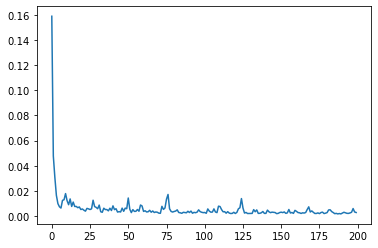

In [90]:
plt.plot(range(len(myloss)), myloss)

In [91]:
predict_train= model.predict_generator(generator_train)
predict_test= model.predict_generator(generator_test)

/home/hugo/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [92]:
sc_test_y

array([[0.97464898],
       [0.95126149],
       [0.97832276],
       [1.00789319],
       [1.01999006],
       [0.96891411],
       [0.95215749],
       [0.94355523],
       [0.94507855],
       [1.09991986],
       [1.06694447],
       [1.07465055],
       [1.0970524 ],
       [1.1374653 ],
       [1.1399743 ],
       [1.08845014],
       [1.08853985],
       [1.12725011],
       [1.15753725],
       [1.16040461],
       [1.12357618],
       [1.10269765],
       [1.07384412],
       [1.11882699],
       [1.13074475],
       [1.13020715],
       [1.13504587],
       [1.15386332],
       [1.16452661],
       [1.1948139 ],
       [1.20825498],
       [1.21336267],
       [1.17967024],
       [1.1680214 ],
       [1.15986711],
       [1.13370169],
       [1.15395303],
       [1.16103207],
       [1.11748295],
       [1.11407766],
       [1.12733964],
       [1.1231281 ],
       [1.12052956],
       [1.06568983],
       [1.03396893],
       [0.98271356],
       [0.96622586],
       [1.007

In [93]:
predictions=pd.DataFrame(predict_test)
predictions.reset_index(drop=True, inplace=True)
test=pd.DataFrame(dataset.iloc[train_size:, 0])
test.reset_index(drop=True, inplace=True)
act= pd.DataFrame(sc_test_y)
act.rename(columns={0:'Stock Price next day'}, inplace=True)
predictions['Actual'] = act['Stock Price next day']
predictions['Date'] = test['Date']
predictions.rename(columns={0:'pred', 1:'Date'}, inplace=True)
predictions.index= predictions['Date']



In [94]:
predictions

,pred,Actual,Date
Date,,,
2017-07-19,0.947590,0.974649,2017-07-19
2017-07-20,0.944984,0.951261,2017-07-20
2017-07-21,0.949105,0.978323,2017-07-21
2017-07-24,0.958024,1.007893,2017-07-24
2017-07-25,0.961458,1.019990,2017-07-25
...,...,...,...
2019-09-18,1.036134,2.248864,2019-09-18
2019-09-19,1.036286,2.212125,2019-09-19
2019-09-20,1.034582,2.189365,2019-09-20


<AxesSubplot:xlabel='Date'>

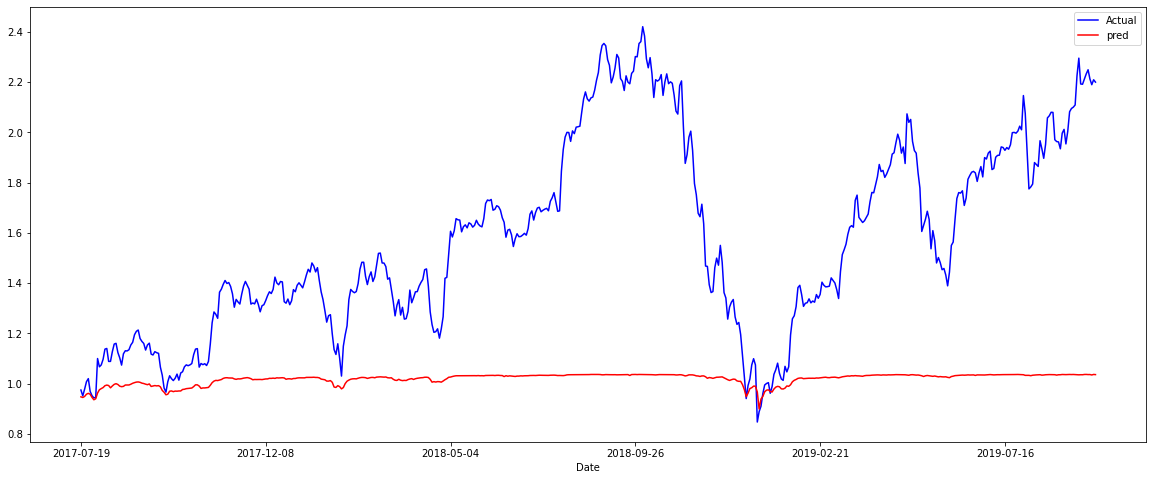

In [95]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
#y['2008'].plot(figsize=(20,8), legend=True, color='green')
predictions['pred'].plot(legend=True, color='red', figsize=(20,8))

In [96]:
train_X

,Volume,Adj Close,Mean
Date,,,
2008-10-01,0.556275,0.017620,0.019318
2008-10-02,0.695398,0.012480,0.015763
2008-10-03,1.000000,0.010753,0.013284
2008-10-06,0.916858,0.011363,0.008474
2008-10-07,0.815191,0.006246,0.009813
...,...,...,...
2017-07-12,0.024051,0.599124,0.608847
2017-07-13,0.024611,0.608090,0.615500
2017-07-14,0.015599,0.613699,0.621700


In [97]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
model= ARIMA(train_y, 
           exog=train_X,
              order=(0,1,1))

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associat

In [98]:
results= model.fit()

In [99]:
predictions= results.predict(start =train_size, end=train_size+829, 
                             exog=test_X)

/home/hugo/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


IndexError: index 553 is out of bounds for axis 0 with size 553

In [ ]:
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
test=pd.DataFrame(dataset.iloc[train_size:, 0])
test.reset_index(drop=True, inplace=True)
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])
predictions['Date'] = test['Date']
predictions.rename(columns={0:'pred', 1:'Date'}, inplace=True)
predictions.index= predictions['Date']
predictions['Actual'] = act['Stock Price next day']


In [ ]:
predictions['Actual'].plot(figsize=(20,8), legend=True, color='blue')
#y['2008'].plot(figsize=(20,8), legend=True, color='green')
predictions['pred'].plot(legend=True, color='red', figsize=(20,8))